In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import time
import warnings

from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_val_score,RandomizedSearchCV

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,plot_confusion_matrix,classification_report,confusion_matrix
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)
plt.style.use('seaborn-whitegrid')


In [188]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
print('train dimm {}' .format(df_train.shape))
df_train.head()

train dimm (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('test dimm {}' .format(df_test.shape))
df_test.head()

test dimm (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
### let's move survived column to the end of the train dataframe

In [6]:
#used df_train.columns, copied the output and moved Survived to the end
df_train=df_train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']]
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


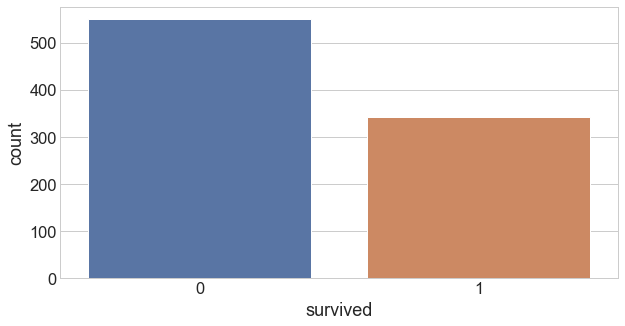

In [191]:
plt.figure(figsize=(10,5))
# sb.set(style='whitegrid',font_scale=1.5)
sb.countplot(df_train['Survived'])
plt.show()

# Missing Value Imputation

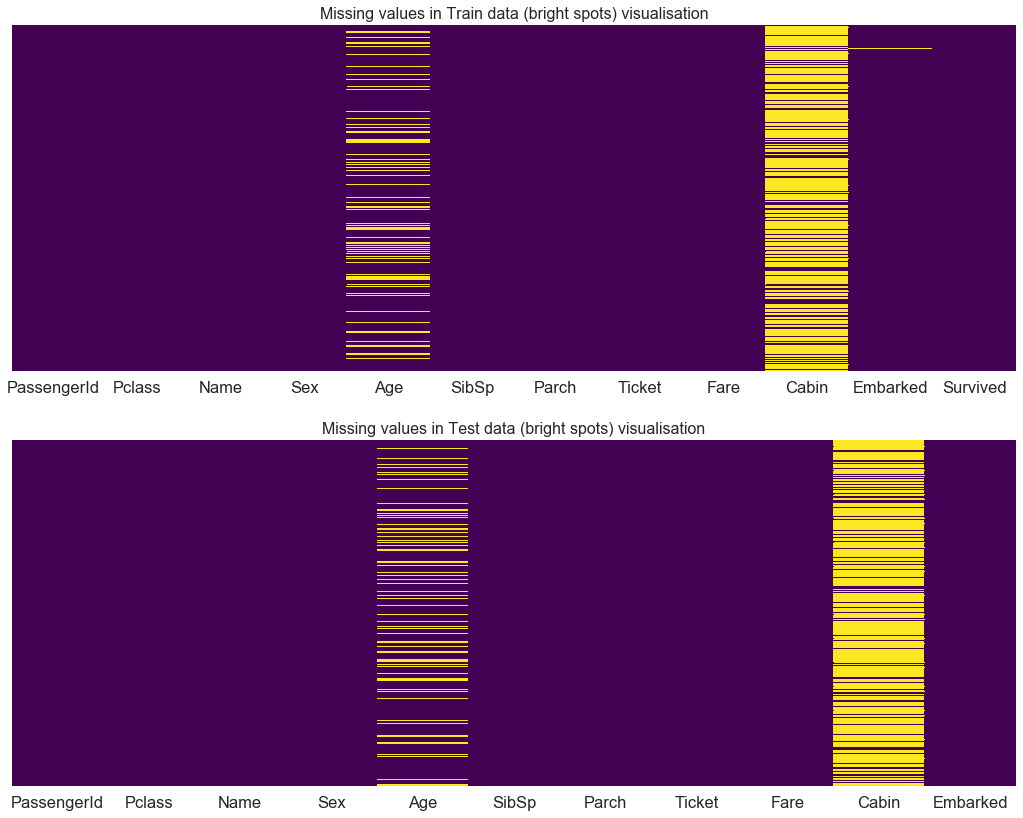

In [8]:
fig,ax=plt.subplots(2,1,figsize=(18,14))
sb.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[0])
ax[0].set_title('Missing values in Train data (bright spots) visualisation',fontsize=16)

sb.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[1])
ax[1].set_title('Missing values in Test data (bright spots) visualisation',fontsize=16)
plt.show()

In [9]:
print('Percentage missing values in Train Data')
np.round((df_train.isnull().sum()/len(df_train))*100,2)

Percentage missing values in Train Data


PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
Survived        0.00
dtype: float64

In [10]:
print('Percentage missing values in Test Data')
np.round((df_test.isnull().sum()/len(df_test))*100,2)

Percentage missing values in Test Data


PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

#### there are missing values both in train and test datasets across same columns-Age and Cabin. Let's impute the missing values in training data and apply same procedure to test data

In [11]:

pc=pd.Categorical(df_train['Pclass'],ordered=True,categories=[3,2,1])
pc=pc.rename_categories(['class3','class2','class1'])
df_train['Pclass']=pc
# pc

# # repeat the same for test dataset also
pc=pd.Categorical(df_test['Pclass'],ordered=True,categories=[3,2,1])
pc=pc.rename_categories(['class3','class2','class1'])
df_test['Pclass']=pc
# pc

# df_train.head()

## Impute the missing values in Age

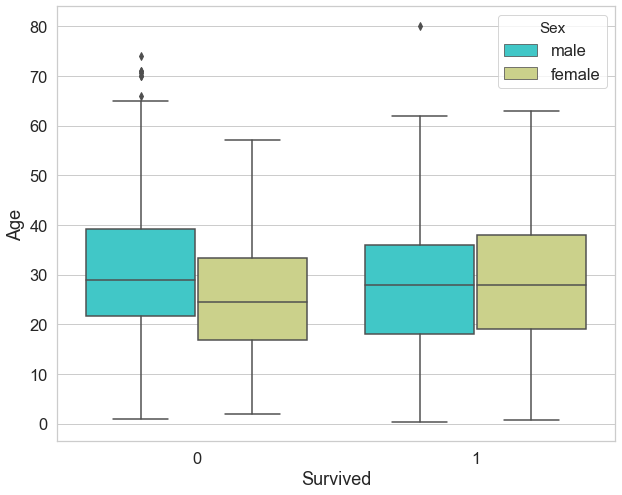

In [12]:
plt.figure(figsize=(10,8))
sb.boxplot(x=df_train['Survived'],y=df_train['Age'],hue=df_train['Sex'],palette='rainbow')
plt.show()

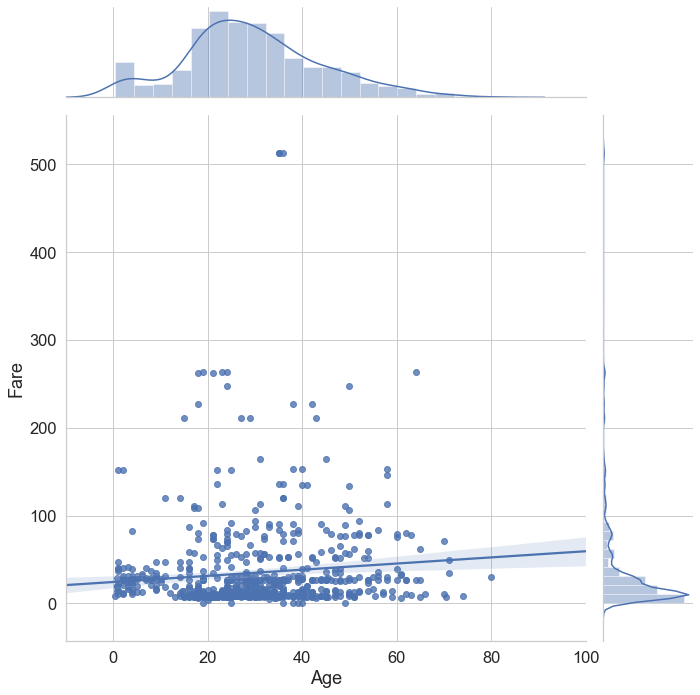

In [13]:
sb.jointplot('Age','Fare',data=df_train,kind='reg',xlim=[-10,100],height=10)
plt.show()

#### The above plot shows tells us that, most of the passengers are around the age of 20-50 and bpught the ticket around ~10-80 dollars

In [14]:
# let us plot this later
# plt.figure(figsize=(10,5))
# sb.barplot(x='Survived',y='Age',data=df_train,hue='Pclass',palette='rainbow')
# plt.show()

Survived
0    28.0
1    28.0
Name: Age, dtype: float64


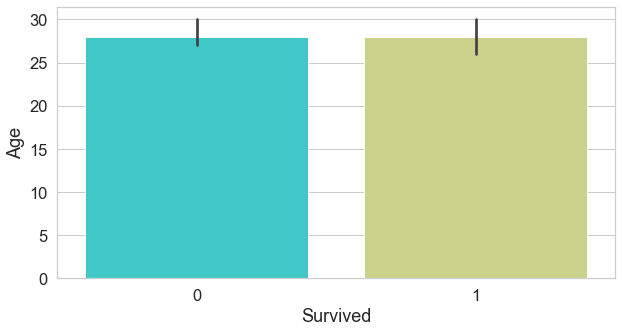

In [15]:
print(df_train['Age'].groupby(by=df_train['Survived']).median())
plt.figure(figsize=(10,5))
sb.barplot(x='Survived',y='Age',data=df_train,palette='rainbow',estimator=np.median)
plt.show()

#### Intially, I thought of filling the missing values in "Age" column using the class (survived or not) median,however, looking at the above results, it seems there is no much of a difference but between mean of ages grouped by class variable

Sex
female    27.0
male      29.0
Name: Age, dtype: float64


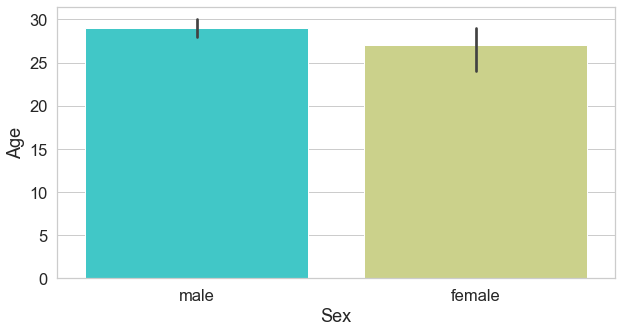

In [16]:
print(df_train['Age'].groupby(by=df_train['Sex']).median())
plt.figure(figsize=(10,5))
sb.barplot(x='Sex',y='Age',data=df_train,palette='rainbow',estimator=np.median)
plt.show()

Pclass
class3    25.140620
class2    29.877630
class1    38.233441
Name: Age, dtype: float64


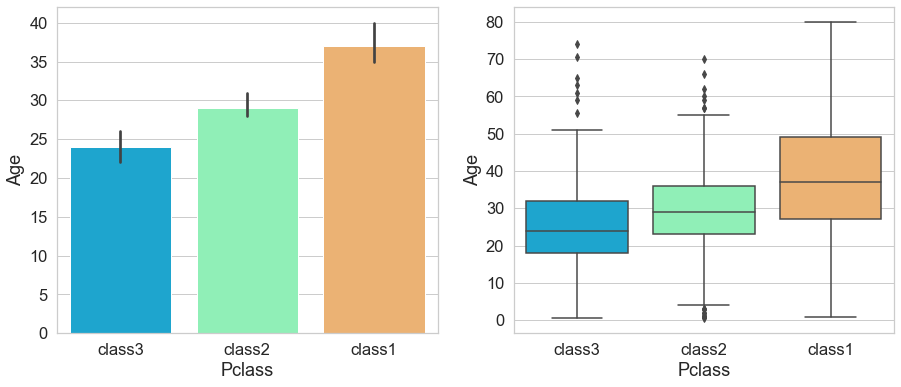

In [17]:
f,ax=plt.subplots(1,2,figsize=(15,6))
print(df_train['Age'].groupby(by=df_train['Pclass']).mean())

sb.barplot(x='Pclass',y='Age',data=df_train,palette='rainbow',ax=ax[0],estimator=np.median)
sb.boxplot(x='Pclass',y='Age',data=df_train,palette='rainbow',ax=ax[1])
plt.show()

#### There seems to be visible difference between the mean age groups of passenger class, the median can be used to fill the missing values of age

In [18]:
df_train['Title']=df_train['Name'].str.extract('([a-zA-z]+)\.')
df_test['Title']=df_test['Name'].str.extract('([a-zA-z]+)\.')
print(df_train.Title.value_counts())
title_top4=[x for x in df_train.Title.value_counts(ascending=False).head(4).index ]
title_top4

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Jonkheer      1
Countess      1
Sir           1
Mme           1
Capt          1
Don           1
Lady          1
Name: Title, dtype: int64


['Mr', 'Miss', 'Mrs', 'Master']

In [19]:
df_train['Title']=['other' if x not in title_top4 else x for x in df_train.Title]
df_train.drop('Name',axis=1,inplace=True)

df_test['Title']=['other' if x not in title_top4 else x for x in df_test.Title]
df_test.drop('Name',axis=1,inplace=True)

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
other     44.5
Name: Age, dtype: float64


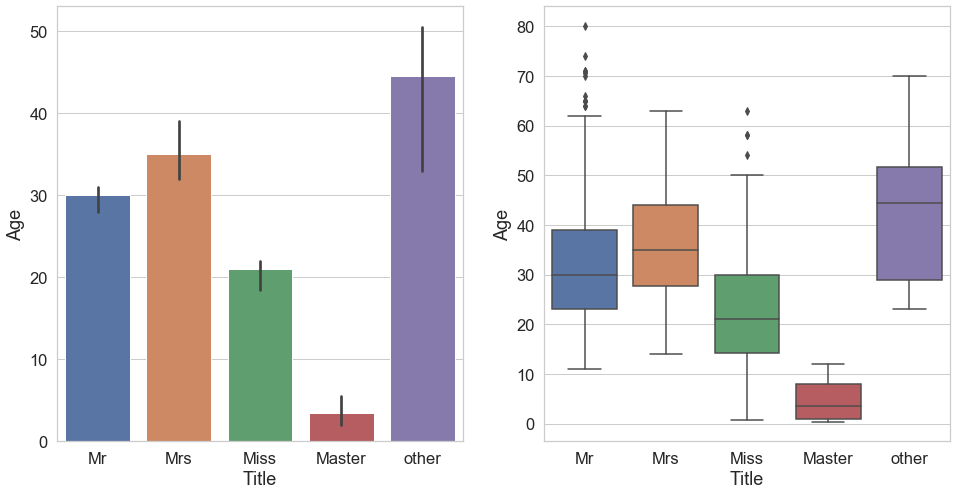

In [20]:
f,ax=plt.subplots(1,2,figsize=(16,8))
print(df_train['Age'].groupby(df_train['Title']).median())

sb.barplot(y=df_train['Age'],x=df_train['Title'],ax=ax[0],estimator=np.median)
sb.boxplot(y=df_train['Age'],x=df_train['Title'],ax=ax[1])
plt.show()

In [21]:
#impute the missing values using Title
df_train['Age'].fillna(df_train.groupby('Title')['Age'].transform('median'),inplace=True)
df_test['Age'].fillna(df_test.groupby('Title')['Age'].transform('median'),inplace=True)


## Imputing missing values in Cabin

In [22]:
df_train['cabin']=df_train['Cabin'].str.extract('^([a-zA-z])')
df_test['cabin']=df_test['Cabin'].str.extract('^([a-zA-z])')


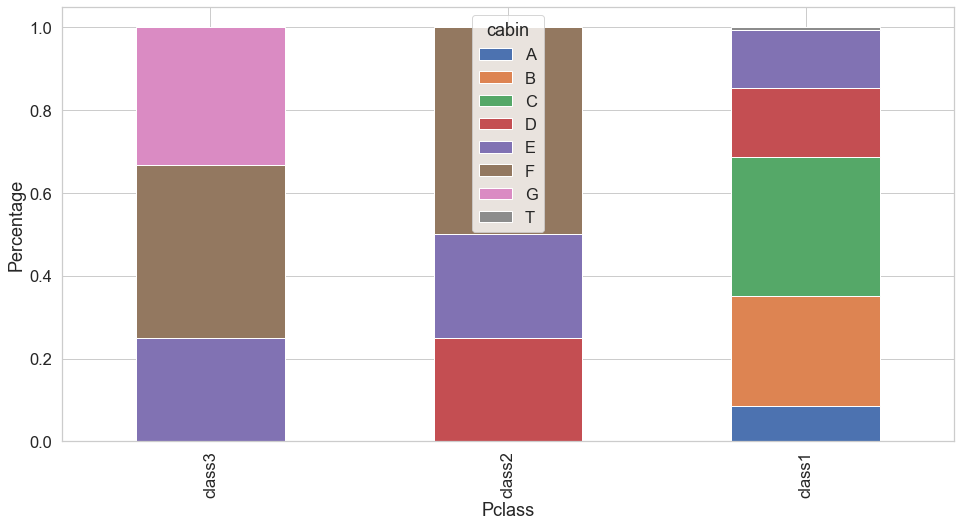

In [23]:
pclass=pd.crosstab(df_train['Pclass'],df_train['cabin'])
pclass.div(pclass.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True,figsize=(16,8))
plt.ylabel('Percentage')
plt.show()

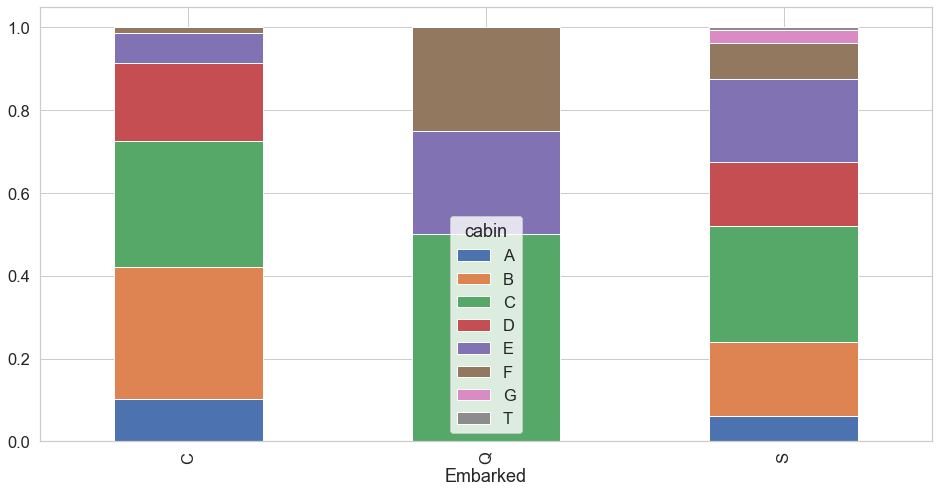

In [24]:
embarked=pd.crosstab(df_train['Embarked'],df_train['cabin'])
embarked.div(embarked.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True,figsize=(16,8))
plt.show()

#### From the above plots, there is no special realtion between Cabin and other variables, so I am imputing the missing values with U(Unknown)

In [25]:
df_train['cabin'].fillna(value='U',inplace=True)
df_test['cabin'].fillna(value='U',inplace=True)

df_train.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,cabin
0,1,class3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,U
1,2,class1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,C
2,3,class3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,U
3,4,class1,female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,C
4,5,class3,male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,U


### Imputing missing values in Embarked in train data and Fare in test data

In [26]:
df_train['Embarked'].fillna(value=df_train.Embarked.mode()[0],inplace=True)
df_test['Fare'].fillna(value=df_test['Fare'].median(),inplace=True)

In [27]:
df_train.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)
print('Training data after Imputation:','\n',df_train.isnull().sum())
print('*'*75,'\n')
print('Testing data after Imputation:','\n',df_test.isnull().sum())

Training data after Imputation: 
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
Title       0
cabin       0
dtype: int64
*************************************************************************** 

Testing data after Imputation: 
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
cabin       0
dtype: int64


In [28]:
df_train.columns=df_train.columns.str.lower()
df_test.columns=df_test.columns.str.lower()


# Exploratory Data Analysis 

### Hypothesis to check
### 1. Class1 has lower death rates when compared to Class3
### 2. Customers who paid higher Fare have high chances of survival
### 3. Females have high chances of survival
### 4. Young people have high chances of survival

### Few more relations between independent variables and dependent variable can be also explored.

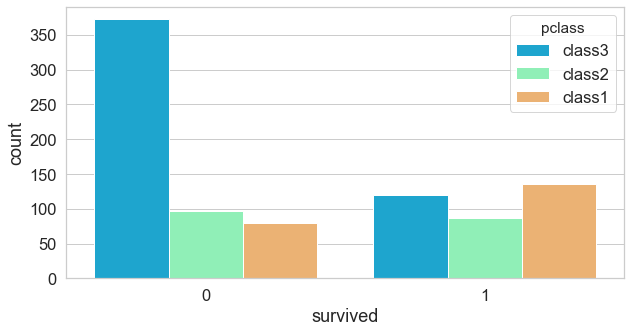

In [29]:
plt.figure(figsize=(10,5))
sb.countplot(x='survived',data=df_train,hue='pclass',palette='rainbow')
plt.show()

##### Class3 people died more than Class1, alternativey more Class1 people survived than Class3

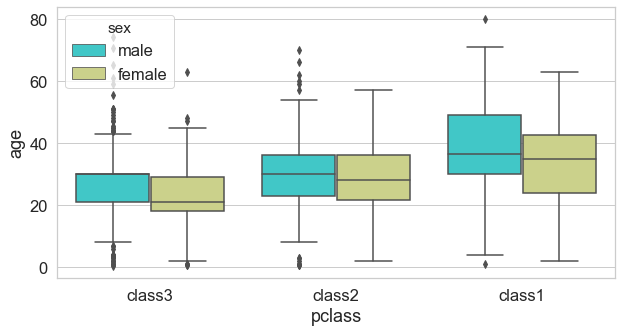

In [30]:
plt.figure(figsize=(10,5))
sb.boxplot(y='age',data=df_train,x='pclass',palette='rainbow',hue='sex')
plt.show()

#### Class1 being highest class (premium class) which acn be afforeded mostly by aged people and above grpah supports this hypothesis

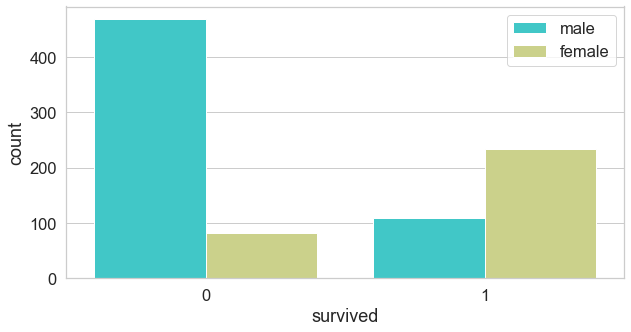

In [31]:
plt.figure(figsize=(10,5))
sb.countplot('survived',hue='sex',data=df_train,palette='rainbow')
plt.legend(loc='best')
plt.show()

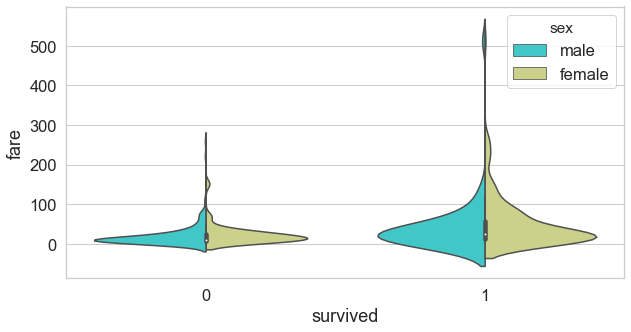

In [32]:
plt.figure(figsize=(10,5))
sb.violinplot(y='fare',data=df_train,x='survived',palette='rainbow',hue='sex',split=True)
plt.show()

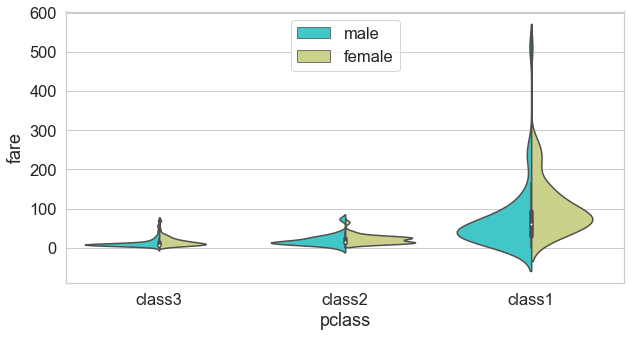

In [33]:
plt.figure(figsize=(10,5))
sb.violinplot(y='fare',data=df_train,x='pclass',palette='rainbow',hue='sex',split=True)
# sb.stripplot(y='fare',data=df_train,x='pclass',palette='rainbow',hue='sex',)
plt.legend(loc='upper center')
plt.show()

#### The above figure supports our second hypothesis i.e. passengers who spent high on fare have high chances of survival. Intutively, First class (class1) cabins cost more and from above figures it shows that first class1 passengers have high chances of survival and females in class1 have superior chances of survival.

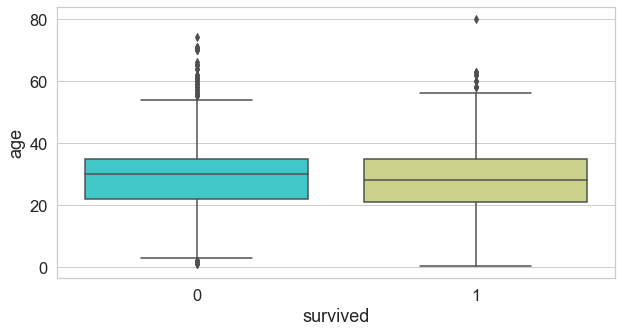

In [34]:
plt.figure(figsize=(10,5))
g=sb.boxplot(y='age',data=df_train,x='survived',palette='rainbow')
plt.show()

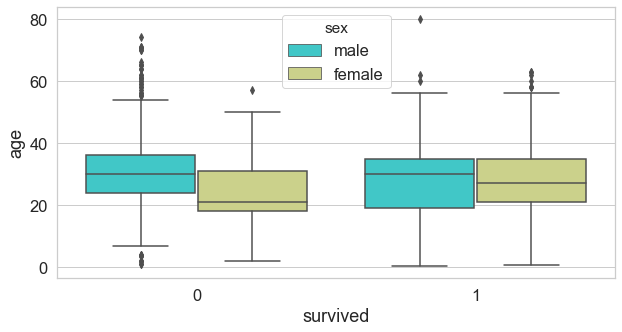

In [35]:
plt.figure(figsize=(10,5))
g=sb.boxplot(y='age',data=df_train,x='survived',palette='rainbow',hue='sex')
plt.show()

#### The above two figures does not support hypothesis 4 i.e. young people have high chances of survival

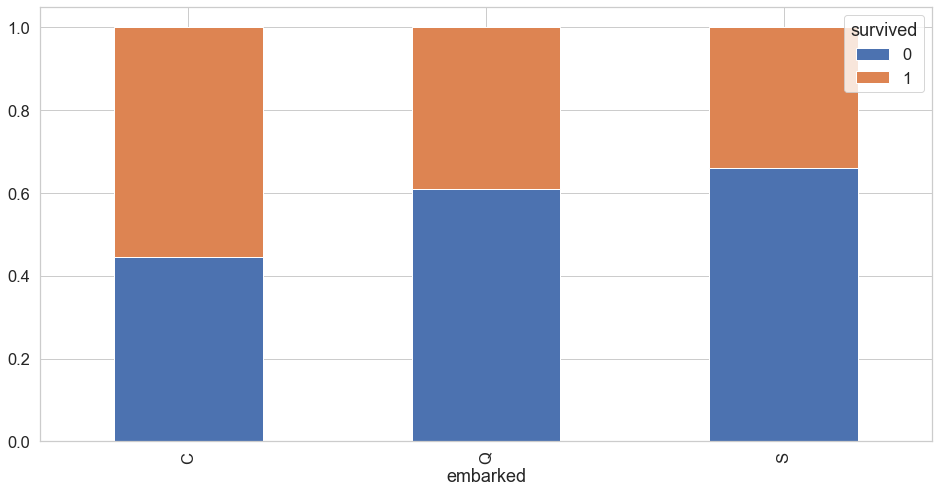

In [36]:
emb=pd.crosstab(df_train.embarked,df_train.survived)
emb.div(emb.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True,figsize=(16,8))
plt.show()

#### Passengers who boarded Titanic at C station survived lot more than S and Q. It seems that at C station people boarded into class1 and at S station people boarded into class3. Let us check this hypothesis

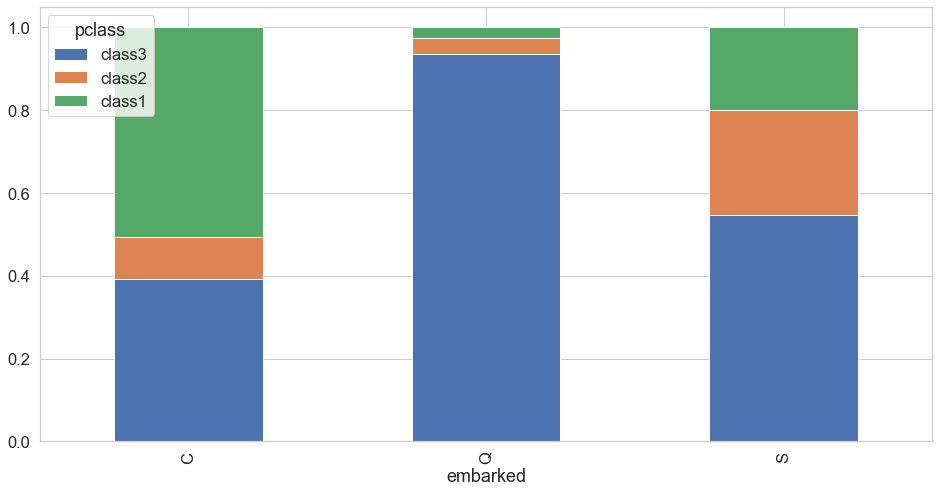

In [37]:
emb2=pd.crosstab(df_train.embarked,df_train.pclass)
emb2.div(emb2.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True,figsize=(16,8))
plt.show()

#### as hypothesised, passengers embarked at C station have boarded into class 1, which has high survival rate

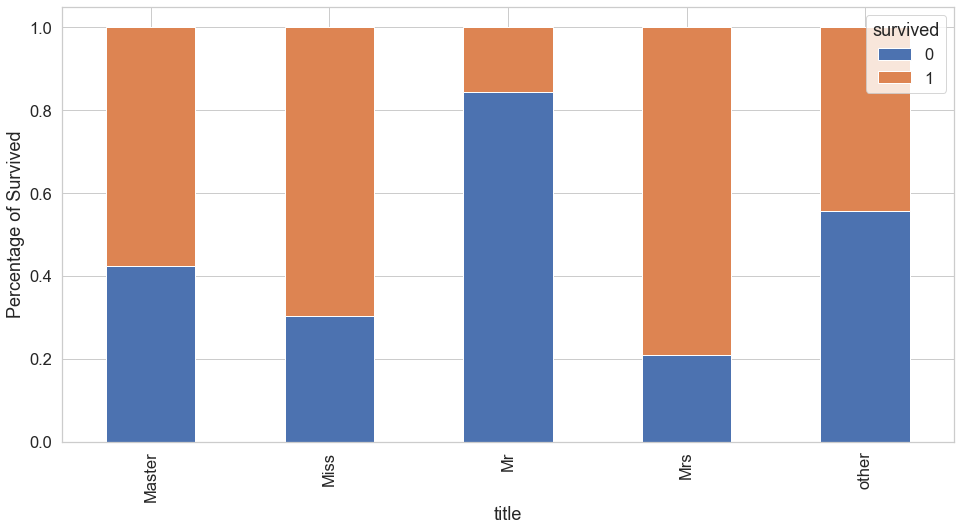

In [38]:
tite=pd.crosstab(df_train.title,df_train.survived)
tite.div(tite.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True,figsize=(16,8))
plt.ylabel('Percentage of Survived')
plt.show()

#### This is an interrsting plot which shows that kids and females (Miss and Mrs) have high percentage of survied rate in comparision to men(Mr). Thi was evident  alread from the earlier plots showing the importance of Gender, however, this is more evident from this plot.

# Feature Engineering

### In this part we will generate more meaningful features from existing features

#### 'Sibsp'->siblings&children and 'Parch'->parents&children

#### Let us combine these two features into single feature and name it as 'relatives' as it contains information of the Sibsp and Parch. Aditionally, I also want to create a categorical variable relatives>0

In [39]:
df_train['relatives']=df_train['sibsp']+df_train['parch']
df_test['relatives']=df_test['sibsp']+df_test['parch']

df_train['family']=np.where(df_train.relatives>0,1,0)
df_test['family']=np.where(df_test.relatives>0,1,0)

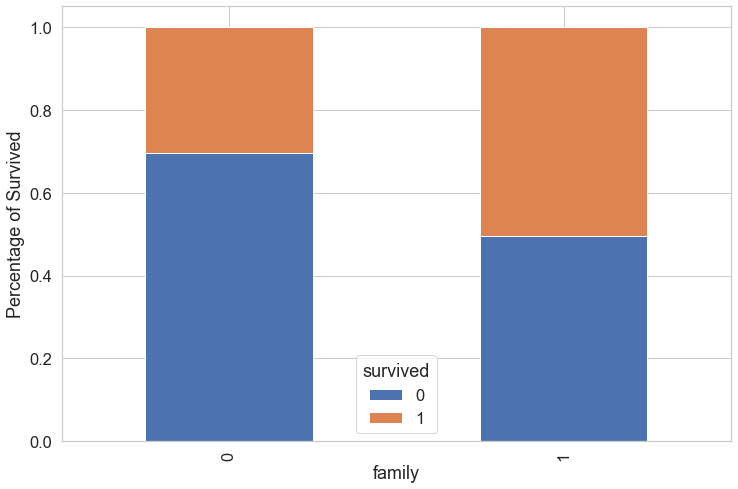

In [40]:
family=pd.crosstab(df_train.family,df_train.survived)
family.div(family.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True,figsize=(12,8))
plt.ylabel('Percentage of Survived')
plt.show()

#### Passengers with family have survived more than passengers without a family. This seems to be an important feature

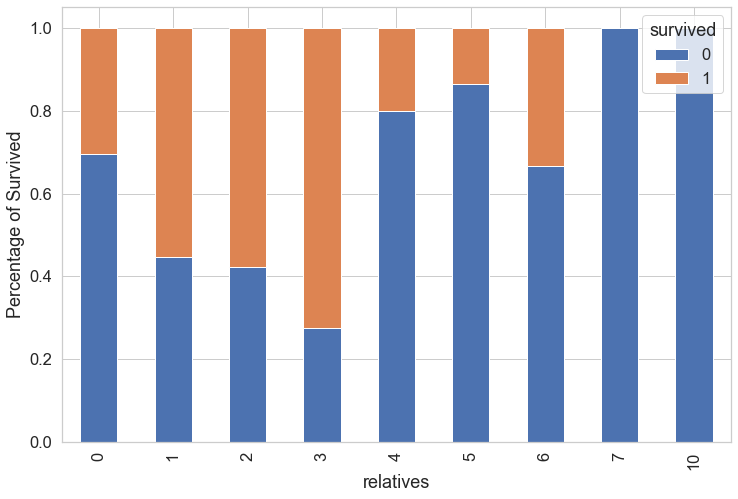

In [51]:
rela=pd.crosstab(df_train.relatives,df_train.survived)
rela.div(rela.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True,figsize=(12,8))
plt.ylabel('Percentage of Survived')
plt.show()

#### above figure shows, how number of relatives play an important role in passengers survival. Passengers with 1,2 or 3 relatives have higher percentage survival when compared to other passengers with either higher than 3 relatives or travelling alone(0 relatives)

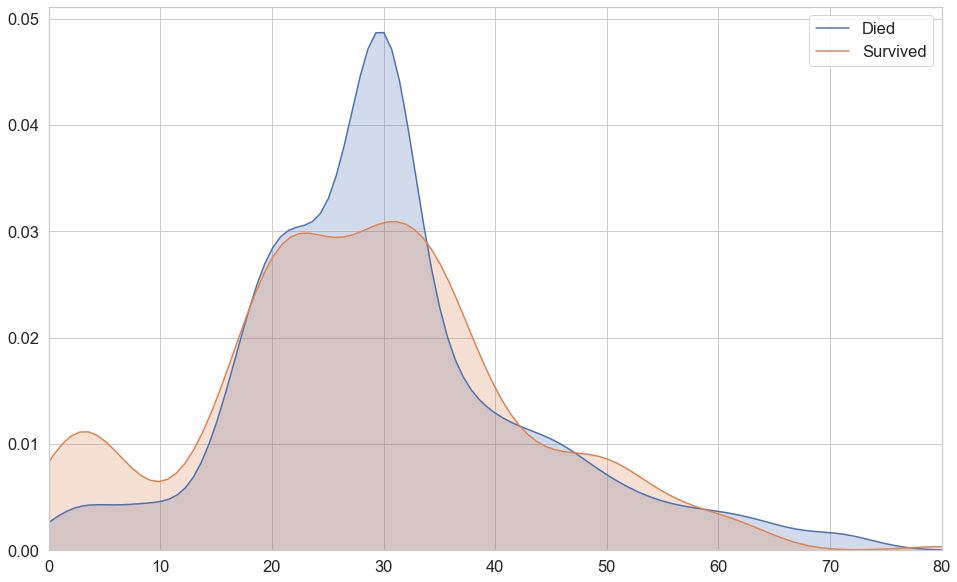

In [41]:
plt.figure(figsize=(16,10))
sb.kdeplot(df_train.age[df_train.survived==0],label='Died',shade=True)
sb.kdeplot(df_train.age[df_train.survived==1],label='Survived',shade=True)
plt.xlim([0,df_train.age.max()])
plt.show()

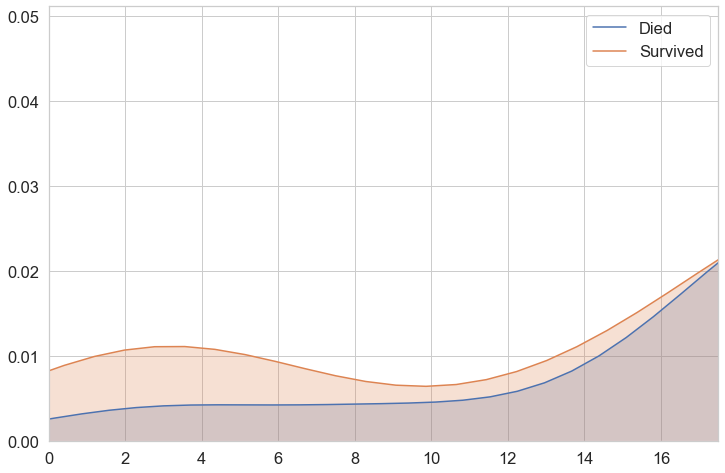

In [42]:
plt.figure(figsize=(12,8))
sb.kdeplot(df_train.age[df_train.survived==0],label='Died',shade=True)
sb.kdeplot(df_train.age[df_train.survived==1],label='Survived',shade=True)
plt.xlim([0,17.5])
plt.show()

#### distribution of passengers aging between 0-17.5 years is higher when compared to passengers who died, these might be binned into one category

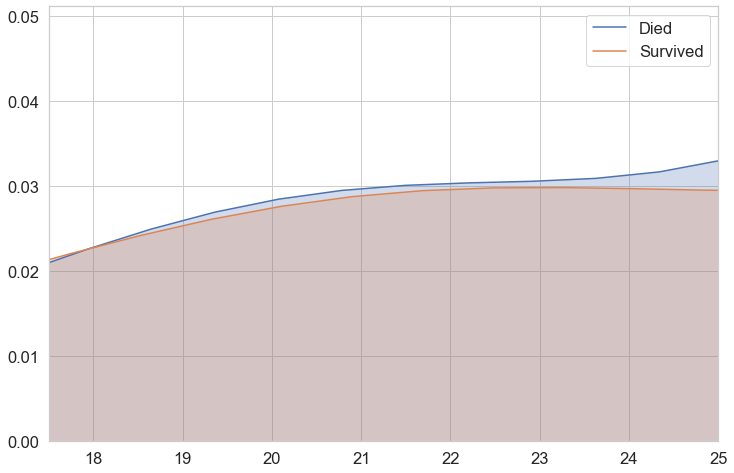

In [43]:
plt.figure(figsize=(12,8))
sb.kdeplot(df_train.age[df_train.survived==0],label='Died',shade=True)
sb.kdeplot(df_train.age[df_train.survived==1],label='Survived',shade=True)
plt.xlim([17.5,25])
plt.show()

#### distribution of passengers aging between 17.5-25 years is higher when compared to passengers who survived, this age group might be binned into one category

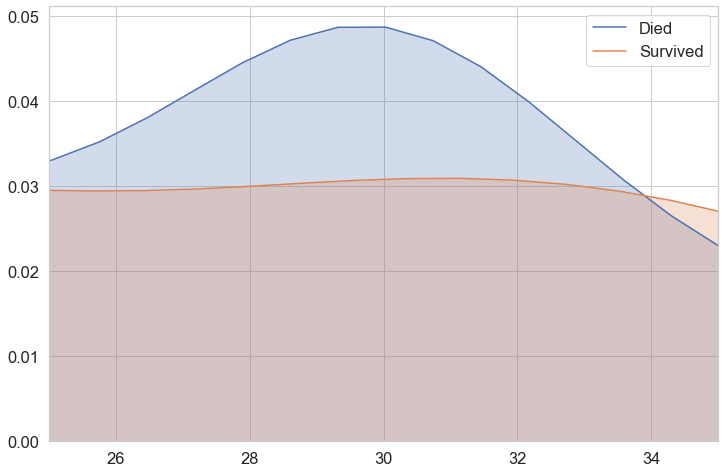

In [44]:
plt.figure(figsize=(12,8))
sb.kdeplot(df_train.age[df_train.survived==0],label='Died',shade=True)
sb.kdeplot(df_train.age[df_train.survived==1],label='Survived',shade=True)
plt.xlim([25,35])
plt.show()

#### distribution of passengers aging between 26-34 years is higher when compared to passengers who survived, this age group might be binned into one category

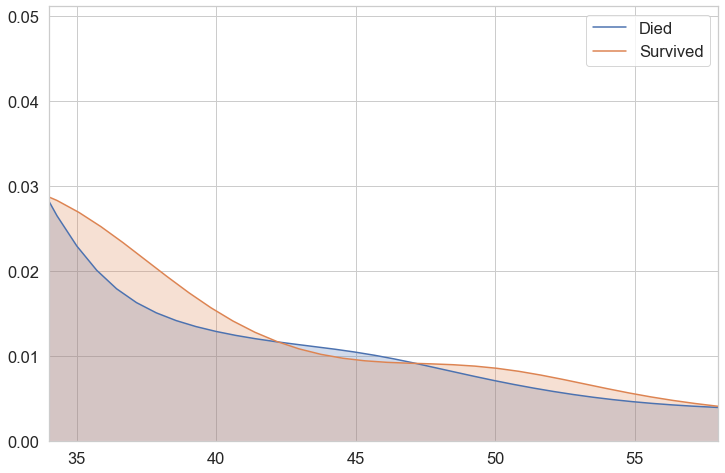

In [45]:
plt.figure(figsize=(12,8))
sb.kdeplot(df_train.age[df_train.survived==0],label='Died',shade=True)
sb.kdeplot(df_train.age[df_train.survived==1],label='Survived',shade=True)
plt.xlim([34,58])
plt.show()

#### distribution of passengers aging between 34-58 years is higher when compared to passengers who died, this age group might be binned into one category

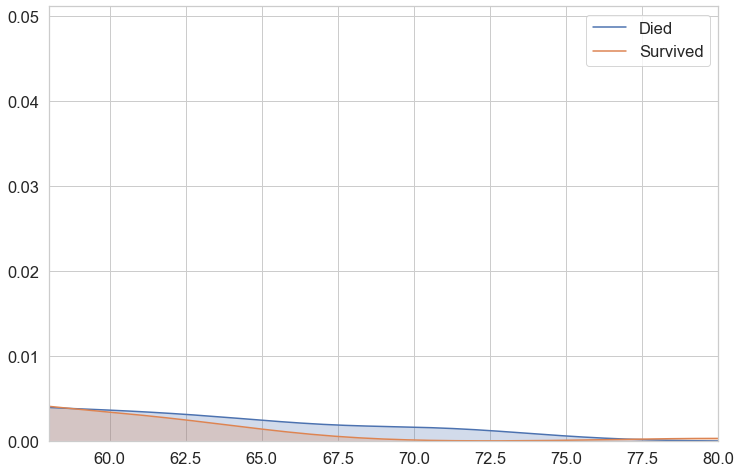

In [46]:
plt.figure(figsize=(12,8))
sb.kdeplot(df_train.age[df_train.survived==0],label='Died',shade=True)
sb.kdeplot(df_train.age[df_train.survived==1],label='Survived',shade=True)
plt.xlim([58,df_train.age.max()])
plt.show()

#### distribution of passengers aging between >58 years is higher when compared to passengers who survived, this age group might be binned into one category

In [134]:
def age_bin(x):
    if x>=0 and x<=17.5:
        return('bin1')
    elif x>16.5 and x<=25:
        return('bin2')
    elif x>25 and x<34:
        return('bin3')
    elif x>34 and x<58:
        return('bin4')
    else:
        return('bin5')

In [135]:
df_train['age_bin']=df_train['age'].apply(age_bin)
df_test['age_bin']=df_test['age'].apply(age_bin)

In [159]:
df_train.shape,df_test.shape

((891, 13), (418, 12))

In [160]:
train=df_train.drop(['sibsp','parch','age'],axis=1)
test=df_test.drop(['sibsp','parch','age'],axis=1)
train.shape,test.shape

((891, 10), (418, 9))

# Feature Selection

### Exploratory data analysis is a kind of feature selection, however, we will use some stats here to estimate the importance of features uviriately. This type of feature selection is called filter metho

#### for categorical features we will chi-square test

In [84]:
from scipy.stats import chi2_contingency, mannwhitneyu
def chi_square(feature):
    stat, p, dof, expected=chi2_contingency(pd.crosstab(feature,train.survived))
    if p<0.05:
        return('is significant')
    else:
        return('is not significant')

In [83]:
print('age_bin ',chi_square(train['age_bin']))
print('pclass ',chi_square(train['pclass']))
print('title ',chi_square(train['title']))
print('relatives ',chi_square(train['relatives']))
print('family ',chi_square(train['family']))

age_bin  is significant
pclass  is significant
title  is significant
relatives  is significant
family  is significant


#### The features which seemed to be sigificant after EDA are also sigificant statistically. Good Signs!!!!

# Predictive Modelling

#### To build the models, all the features have to be in numerical format. I will use LabelEncoder to encode them into numbers. As a word of caution, these numbers are categorical variables, which means these no mathetical operations should be performed on these variables

In [161]:
print(train.columns,'\n',test.columns)

Index(['pclass', 'sex', 'fare', 'embarked', 'survived', 'title', 'cabin',
       'relatives', 'family', 'age_bin'],
      dtype='object') 
 Index(['pclass', 'sex', 'fare', 'embarked', 'title', 'cabin', 'relatives',
       'family', 'age_bin'],
      dtype='object')


In [162]:
# let us convert the variables to dummy variables
cate=['pclass','sex','embarked','title','age_bin','cabin']
train_dum=pd.get_dummies(train[cate],drop_first=True)
train_final=pd.concat([train.drop(cate,axis=1),train_dum],axis=1)

test_dum=pd.get_dummies(test[cate],drop_first=True)
test_final=pd.concat([test.drop(cate,axis=1),test_dum],axis=1)

                       

In [165]:
train_final.shape,test_final.shape

((891, 25), (418, 23))

In [139]:
train_final.head()

,fare,survived,relatives,family,pclass_class2,pclass_class1,sex_male,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_other,age_bin_bin2,age_bin_bin3,age_bin_bin4,age_bin_bin5,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U
0,7.2500,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,71.2833,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
2,7.9250,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,53.1000,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,8.0500,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [140]:
test_final.head()

,fare,relatives,family,pclass_class2,pclass_class1,sex_male,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_other,age_bin_bin2,age_bin_bin3,age_bin_bin4,age_bin_bin5,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_U
0,7.8292,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,7.0000,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,9.6875,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,8.6625,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,12.2875,2,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


#### There is small flaw here,cabin_T is present in train data and not present in test data. For this reason, we have to either add 'cabin_T' to test data or LabelEncode train and test data together or use .map function 

In [167]:
train.head()

,pclass,sex,fare,embarked,survived,title,cabin,relatives,family,age_bin
0,class3,male,7.2500,S,0,Mr,U,1,1,bin2
1,class1,female,71.2833,C,1,Mrs,C,1,1,bin4
2,class3,female,7.9250,S,1,Miss,U,0,0,bin3
3,class1,female,53.1000,S,1,Mrs,C,1,1,bin4
4,class3,male,8.0500,S,0,Mr,U,0,0,bin4


In [172]:
cabin_map={'U':1, 'C':2, 'E':3, 'G':4, 'D':5, 'A':6, 'B':7, 'F':8, 'T':9}
sex_map={'male':0,'female':1}
embarked_map={'S':1, 'C':1, 'Q':2}
title_map={'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'other':5}
age_bin_map={'bin1':1,'bin2':2,'bin3':3,'bin4':4,'bin5':5}
pclass_map={'class1':1,'class2':2,'class3':3}

train.cabin=train.cabin.map(cabin_map)
train.sex=train.sex.map(sex_map)
train.embarked=train.embarked.map(embarked_map)
train.title=train.title.map(title_map)
train.age_bin=train.age_bin.map(age_bin_map)
train.pclass=train.pclass.map(pclass_map)

test.cabin=test.cabin.map(cabin_map)
test.sex=test.sex.map(sex_map)
test.embarked=test.embarked.map(embarked_map)
test.title=test.title.map(title_map)
test.age_bin=test.age_bin.map(age_bin_map)
test.pclass=test.pclass.map(pclass_map)


In [176]:
train.shape,test.shape

((891, 10), (418, 9))

In [177]:
train.head()

,pclass,sex,fare,embarked,survived,title,cabin,relatives,family,age_bin
0,3,0,7.2500,1,0,1,1,1,1,2
1,1,1,71.2833,1,1,2,2,1,1,4
2,3,1,7.9250,1,1,3,1,0,0,3
3,1,1,53.1000,1,1,2,2,1,1,4
4,3,0,8.0500,1,0,1,1,0,0,4


In [171]:
train.age_bin.unique(),test.age_bin.unique()

(array(['bin2', 'bin4', 'bin3', 'bin1', 'bin5'], dtype=object),
 array(['bin4', 'bin5', 'bin3', 'bin2', 'bin1'], dtype=object))

In [178]:
#let us build simple logistic regression
logis=cross_val_score(LogisticRegression(),train_final.drop('survived',axis=1),train_final.survived,
                cv=10,scoring='accuracy',n_jobs=-1)
print('Logistic Regression (Mean +/-std):', logis.mean(),'(+/-',logis.std(),')')

svc=cross_val_score(LinearSVC(),train_final.drop('survived',axis=1),train_final.survived,
                cv=10,scoring='accuracy',n_jobs=-1)
print('SVC (Mean +/-std):', svc.mean(),'(+/-',svc.std(),')')

rf=cross_val_score(RandomForestClassifier(),train_final.drop('survived',axis=1),train_final.survived,
                cv=10,scoring='accuracy',n_jobs=-1)
print('Random Forest (Mean +/-std):', rf.mean(),'(+/-',rf.std(),')')

# log_params={'C':[0.0001,0.001,0.01,0.1,1,10,50,100,500,1000]}
# log_grid=GridSearchCV(log_reg,log_params,
#                       n_jobs=-1,
#                       scoring='accuracy',cv=5).fit(train_final.drop('survived',axis=1),train_final.survived)

Logistic Regression (Mean +/-std): 0.8271785268414483 (+/- 0.03514316251872521 )
SVC (Mean +/-std): 0.802621722846442 (+/- 0.0643726421518534 )
Random Forest (Mean +/-std): 0.8058052434456929 (+/- 0.043934116854021245 )


### Logistic Regression seems to be working well, let us build a Logistic Regression model on train data

In [181]:
testData=pd.read_csv('test.csv')
clf_log=LogisticRegression().fit(train.drop('survived',axis=1),train_final.survived)
test_pred=pd.DataFrame({'PassengerId':testData.PassengerId,
                         'Survived':clf_log.predict(test)})
test_pred.to_csv('predictionsV1.csv',index=False)

In [182]:
test_pred.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [185]:
lr_imp=pd.DataFrame(np.transpose(clf_log.coef_),index=train.drop('survived',axis=1).columns,
            columns=['importance']).sort_values('importance',ascending=False)

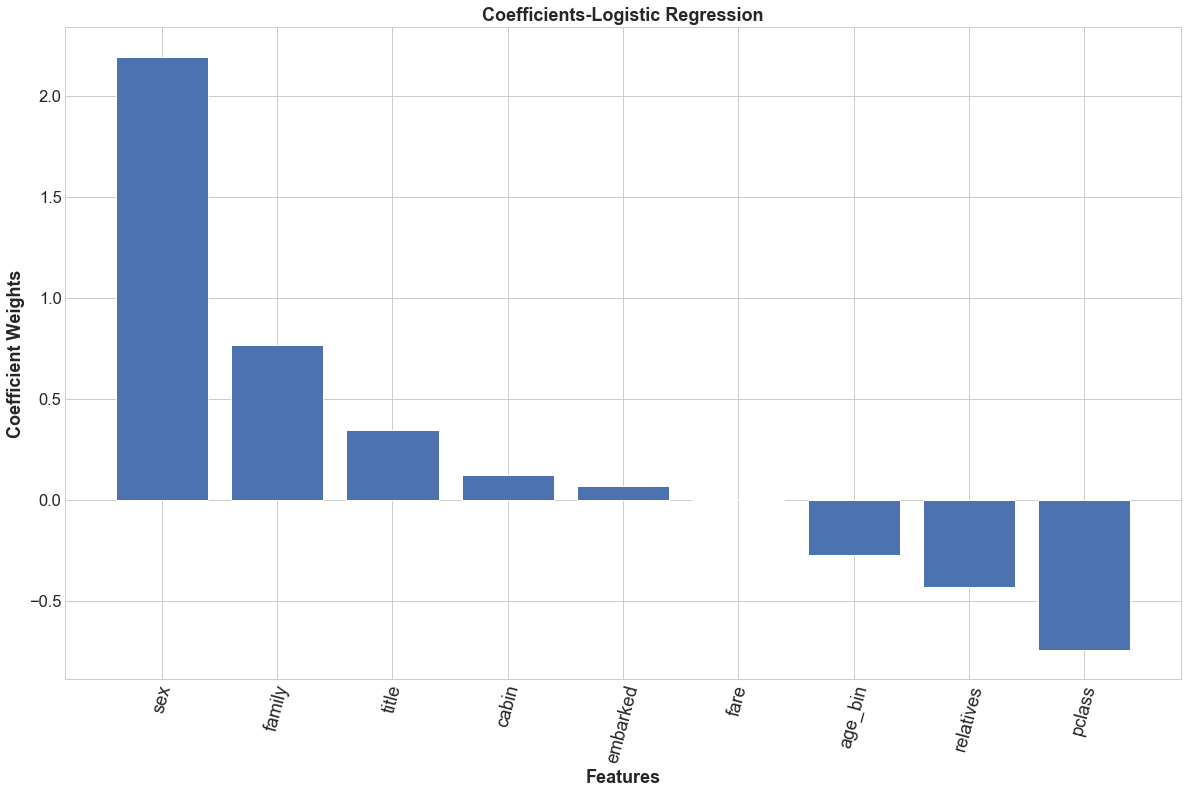

In [199]:
plt.figure(figsize=(20,12))
plt.bar(x=lr_imp.index,height=lr_imp.importance)
plt.xticks(rotation=90)
plt.ylabel('Coefficient Weights',fontsize=18,fontweight='bold')
plt.xlabel('Features',fontsize=18,fontweight='bold')
plt.xticks(rotation=75,fontsize=18)
plt.title('Coefficients-Logistic Regression',fontsize=18,fontweight='bold')
plt.show()